<a href="https://colab.research.google.com/github/pranjalchaubey/Deep-Learning-Notes/blob/master/PyTorch%20Image%20Classification%20in%202020/Image_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using PyTorch in 2020  

In this notebook we will be utilizing some of the latest advancements in the  
[PyTorch Ecosystem](https://pytorch.org/ecosystem/) to build a simple image classifier using CNNs.   

Along the way, we will learn some PyTorch and CNN (Convolution Neural  
Networks) basics. 

### 1. Get the Dataset Onboard

In any Machine Learning/Data Science problem, the first step is always to get  
the dataset.  

In our case, to get things started, we will initially use the simple [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database).  
MNIST is largely considered the _'Hello World!'_ of AI/ML. The dataset was  
created way back in the late 90s. The [official description](http://yann.lecun.com/exdb/mnist/) states,  

_"The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image._  

_It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting."_  

<br/>You might be wondering, how to get this dataset in our Colab Workspace?  
PyTorch comes with a _datasets_ module called, [Torchvision.Datasets](https://pytorch.org/docs/stable/torchvision/datasets.html).  
Torchvision.Datasets module contains a number of publically available datasets  
including the one we are looking for, MNIST. You are encouraged to explore the  
Torchvision.Datasets documentation page. 

In [0]:
# Lets import some libraries 
import torch # PyTorch 
from torchvision import datasets # Datasets module 
import torchvision.transforms as transforms # Image Transforms 
from torch.utils.data.sampler import SubsetRandomSampler # Sampler 

In [0]:
# The Data Science Regulars
import numpy as np 
import pandas as pd

Checking out the torchvision.datasets module documentation, we find  
![Torchvision.Dataset](https://drive.google.com/uc?id=1Zsgc5_PnO9BQQ5wqssf67A5Ge-qIXtLh)



In [0]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

### 2. Train Validation Test Split 

Once the download is complete (usually instantaneous), you should be able to  
see the MNIST dataset downloaded inside the _'data'_ folder on the left hand  
side. (Click on the _Files_ icon on the left sidebar)  

We have both the training and the test sets. Now we need to bifurcate the   
training set in two parts,  
1. Training Set (80% images)
2. Validation Set (20% images)  

The algorithm we use to do this is quite simple,  
1. Create a list of indices of the training data 
2. Randomly Shuffle those indices 
3. Slice the indices in 80-20 split 

[Why create a _Validation Set_ at all?](https://datascience.stackexchange.com/questions/18339/why-use-both-validation-set-and-test-set) 

In [69]:
# obtain training indices that will be used for validation

# 1. Create a list of indices of the training data  
num_train = len(train_data)
print('num_train = len(train_data) ==> ', num_train)
indices = list(range(num_train))
print('len(indices) ==>', len(indices))
# print(indices)

num_train = len(train_data) ==>  60000
len(indices) ==> 60000


In [0]:
# 2. Randomly Shuffle those indices
np.random.shuffle(indices)

In [71]:
# 3. Slice the indices in 80-20 split
# percentage of training set to use as validation
valid_size = 0.2 # ie Train Set divided into two parts 
                 # 80% Train 20% Validation 
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

print('len(train_idx) ==> ', len(train_idx))
print('len(valid_idx) ==> ', len(valid_idx))

len(train_idx) ==>  48000
len(valid_idx) ==>  12000


Please Note that so far we have just been fiddling around with the _'indices'_,  
not the actual images as such.....but Why?  
Answer below.  

### 3. Prepare the Dataloaders 

By now, we have downloaded the dataset, and created a train/valid/test split.  
Q: How do we _'push'_ this data into a PyTorch model?  
A: PyTorch has a mechanism to _'ingest'_ data from a dataset through a module  
known as `DataLoader`.  

A great analogy,  
![DataLoader](https://drive.google.com/uc?id=1U4IG-5lbFGQQS4xwQPU2QiYdR1hFGBZ5)

[Great tutorial on DataLoaders.](https://www.journaldev.com/36576/pytorch-dataloader)  
[Ultimate tutorial on DataLoaders.](https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel) 

Time to prepare the _DataLoaders_ now!  

![DataLoader Documentation](https://drive.google.com/uc?id=1YFbWIGwNlL5Kp4Zvt52Ck0_Wk4MNfxS9)

In [0]:
# define samplers for obtaining training and validation batches
# remember train_idx and valid_idx were the indices that we shuffled above
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare dataloaders
# number of subprocesses to use for data loading
num_workers = 0 # do not modify 
# how many samples per batch to load
batch_size = 20 # ie 20 images per batch 

# Training Set 
train_loader = torch.utils.data.DataLoader(dataset=train_data, \
                                           batch_size=batch_size, \
                                           sampler=train_sampler, \
                                           num_workers=num_workers)
# Validation Set 
valid_loader = torch.utils.data.DataLoader(dataset=train_data, \
                                           batch_size=batch_size, \
                                           sampler=valid_sampler, \
                                           num_workers=num_workers)
# Test Set 
# Notice we have not used a 'sampler' here as it was not required 
test_loader = torch.utils.data.DataLoader(dataset=test_data, \
                                          batch_size=batch_size, \
                                          num_workers=num_workers)

We got the dataloaders working, but how do we know that they are working indeed?  
Visualizing the data from the dataloaders would be a good check! 

In [89]:
# Visualize a whole batch of data from the dataloaders 

dataiter = iter(train_loader) # Get the whole batch 
images, labels = dataiter.next() # Extract the images and their labels 
print(len(images), len(labels)) # Should be equal to the batch size, 20
print('Correct Labels: ', labels)
images = images.numpy() # Convert the images to numpy array for matplotlib
print('Shape of our images tensor =', images.shape)
print('Batch Size =', images.shape[0], 'Image Height/Width =', \
                                                        images.shape[2])

print()
print('Squeezing the images tensor =', np.squeeze(images).shape)
print('Un-squeezing the images tensor (axis=1) =', \
                                        np.expand_dims(images, axis=1).shape)

20 20
Correct Labels:  tensor([0, 4, 5, 0, 2, 0, 3, 1, 3, 5, 3, 7, 2, 7, 6, 1, 6, 2, 4, 8])
Shape of our images tensor = (20, 1, 28, 28)
Batch Size = 20 Image Height/Width = 28

Squeezing the images tensor = (20, 28, 28)
Un-squeezing the images tensor (axis=1) = (20, 1, 1, 28, 28)


In [0]:
import matplotlib.pyplot as plt 
# Plots are plotted inside the notebooks, 'inline'
%matplotlib inline 

With matplotlib, always remember that _figures contain axes which in turn   
contain the plots_.  
![Real Python](https://drive.google.com/uc?id=1KdlAGoCK8Lj9pFkrZf52oqOJK3sH3JuH)  

[Great tutorial on Matplotlib.](https://realpython.com/python-matplotlib-guide/)

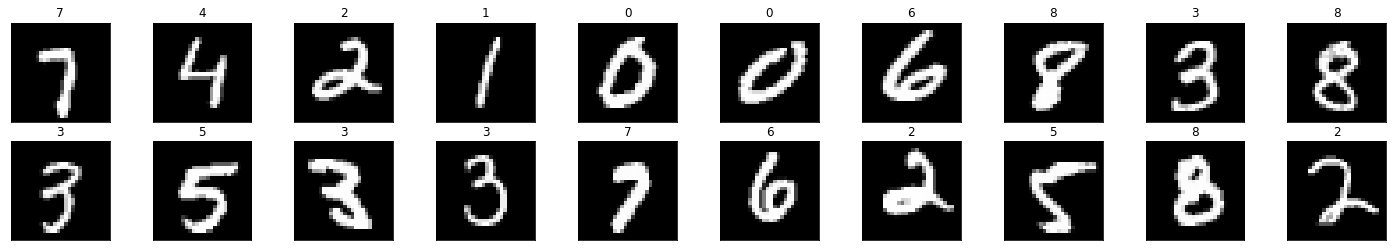

In [75]:
# Plot the whole batch 
fig = plt.figure(figsize=(25, 4))
# Loop over all the images in the batch(20)
for idx in np.arange(20):
    # Add a subplot for the image 
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    # Populate the subplot with the image 
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [109]:
# A neat little numpy trick
# Just for fun! 

dataiter = iter(train_loader)  
images, labels = dataiter.next() 
images = images.numpy() 
np.set_printoptions(precision=2, threshold=None, edgeitems=None, \
                    linewidth=180, suppress=None)
print(images[0])

[[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.37 0.99 0.99 0.99 0.84 0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.45 0.94 0.96 0.99 0.99 0.99 0.83 0.   0.   0.   0.   0. 

Our dataloaders seem to be working fine and out data looks great!  
<br/> 
Time to build our CNN based image classification model in PyTorch.....in 2020! 

### 4. Build a PyTorch CNN Model
But first, we need to know what are the components of a typical CNN based  
image classification architecture. 



| INSERT CNN INTRODUCTION | 

| INSERT PYTORCH INTRODUCTION | 

In [77]:
# Let's install some really cool libraries that will make our lives easy 
!pip install poutyne # https://poutyne.org/index.html
!pip install torchsummary # https://github.com/sksq96/pytorch-summary 

In [0]:
# Let's import some cool functions from these libraries 
from poutyne.framework import Model # The core datastructure of poutyne 
from poutyne.framework import ModelCheckpoint # Saves trained model during training
from poutyne.framework import Callback # We will see it in action in a little while 

from torchsummary import summary # Produces a summary of our model

Time to define our model!  
But before we start off with the model definition, let's have a look at what  
the PyTorch Documentation says about the Convolutional NNs.  
![Conv2d Layer](https://drive.google.com/uc?id=1odHZIXURYjogjUcyCQ56RYfQPqgzO7DX "Conv2D")  

We also need to check out about the MaxPool, Dropout and Linear Layers.  

![MaxPool 2D](https://drive.google.com/uc?id=1r1EeLHrV5oAG4OUyRSm0lw2OcZyJQ7ne "MaxPool2D Layer")  

![Dropout Layer](https://drive.google.com/uc?id=1kYgb4wDrGEBEF5WB169N7Q5hTrwDDO1d "Dropout Layer")  

![Linear Layer](https://drive.google.com/uc?id=1rrIEqPtun_8Td1js76B2hv22Xm5tjY6m "Linear Layer")  

Did you guys notice a weird anomaly in the Conv2d and Linear layers?  
```
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
```  
```
torch.nn.Linear(in_features, out_features, bias=True)
```

Conv2d layer expects `in_channels` while the Linear layer expects `in_features`.  

Bottom line is, that PyTorch expects different things from a tensor dimension.  
Specifically,  
```
"""Example tensor size outputs, how PyTorch reads them, and where you encounter them in the wild. 
Note: the values below are only examples. Focus on the rank of the tensor (how many dimensions it has)."""
>>> torch.Size([32])
    # 1d: [batch_size] 
    # use for target labels or predictions.
>>> torch.Size([12, 256])
    # 2d: [batch_size, num_features (aka: C * H * W)]
    # use for as nn.Linear() input.
>>> torch.Size([10, 1, 2048])
    # 3d: [batch_size, channels, num_features (aka: H * W)]
    # when used as nn.Conv1d() input.
    # (but [seq_len, batch_size, num_features]
    # if feeding an RNN).
>>> torch.Size([16, 3, 28, 28])
    # 4d: [batch_size, channels, height, width]
    # use for as nn.Conv2d() input.
>>>  torch.Size([32, 1, 5, 15, 15])
    # 5D: [batch_size, channels, depth, height, width]
    # use for as nn.Conv3d() input.
```    

A neat method to make your tensors ready for the linear layer,  
```
Use view() to change your tensor’s dimensions.

image = image.view(batch_size, -1)

You supply your batch_size as the first number, and then “-1” basically tells Pytorch, “you figure out this other number for me… please.” 
Your tensor will now feed properly into any linear layer.
```

[Incredible Tutorial on PyTorch Layer Dimensions.](https://towardsdatascience.com/pytorch-layer-dimensions-what-sizes-should-they-be-and-why-4265a41e01fd)

Before we start,  
1. What is the shape (dimensions) of our images?  
2. What is the shape of our batches? 
3. How many _'channels'_ are there in our images? 

In [0]:
import torch.nn as nn # nn module contains all the layers 
import torch.nn.functional as F # same as nn, but a little different 

In [0]:
# Our CNN based neural architecture 
# Let's build a simple one with only Convolutional, Linear 
# and dropout layers
class MNISTModel1(nn.Module):
    # Here we define the neural architecture 
    def __init__(self):
        super(MNISTModel1, self).__init__() # Initialize the nn module 
        
        # Convolutional Layers
        # What shape/dimensions the first layer is going to see? 
        # Do we need to have some padding for a kernel_size = 3?  
        # Input Features = 1 x 28 x 28
        # Output Features = ???
        # Shape of a Convolutional Layer = (W - K + 2P)
        #                                  ------------ + 1
        #                                       S
        # where, 
        #       W = Width/Height of previous layer = 28
        #       K = Filter Size = 3
        #       P = Padding = 0
        #       S = Stride = 1(default)
        # Therefore, 
        #           if padding = 0
        #           Output Shape = ((28 - 3 + 2*0)/1)+1 = 26 
        # We want the dimensions to stay the same so that there is no 
        # loss of information when performing the convolution. 
        # Hence, 
        #       if padding = 1
        #       Output Shape = ((28 - 3 + 2*1)/1)+1 = 28
        # Output Features = 8 x 28 x 28  
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, \
                               stride=1, padding=1)
        # Input Features = 8 x 28 x 28
        # Output Features = 16 x 28 x 28 | ((28 - 3 + 2*1)/1)+1 = 28
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, \
                               stride=1, padding=1)

        # Linear Layers 
        # What shape the first linear layer is going see?
        # What are the total number of features given out by conv2?
        # Features = 16 x 28 x 28 = 12544
        # Therefore,           
        self.linear1 = nn.Linear(in_features=12544, out_features=256)
        self.linear2 = nn.Linear(in_features=256, out_features=64)
        # Last linear layer should output 10 features as we are 
        # Classifying the images in 10 categories 
        self.linear3 = nn.Linear(in_features=64, out_features=10)

        # Dropout 
        self.dropout = nn.Dropout(p=0.25)

    # Here we define the 'forward behaviour' of our neural architecture 
    def forward(self, image_batch):
        # This is also the place where we add ACTIVATION functions 
        image_batch = F.relu(input=self.conv1(image_batch))          
        image_batch = F.relu(input=self.conv2(image_batch))  
        
        # Remember that when passing image_batch through the Linear layers, 
        # PyTorch expects: 
        # >>> torch.Size([12, 256]) -> example values 
            # 2d: [batch_size, num_features (aka: C * H * W)]
            # use for nn.Linear() input.   
        # Therefore, we need to 'flatten' image_batch
        # image_batch = image_batch.view(batch_size, -1) --> batch size ???
        flat_image_batch = image_batch.view(image_batch.shape[0], -1)
        flat_image_batch = F.relu(input=self.linear1(flat_image_batch))
        # Let's add the dropout too 
        flat_image_batch = self.dropout(F.relu(input=self.linear2(flat_image_batch)))
        # Final Layer of the network 
        flat_image_batch = F.relu(input=self.linear3(flat_image_batch))
        # The output from the final layer is a tensor with 10 'logits'
        return flat_image_batch               

In [105]:
# We can make the use of torchsummary libaray here to figure 
# if we have done something wrong 

# But first we need to tell PyTorch where to 'keep' the model 
# On GPU or on CPU 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
print('The model will run on', device)

mnist1 = MNISTModel1().to(device)
summary(model=mnist1, input_size=(1, 28, 28), batch_size=20)

The model will run on cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [20, 8, 28, 28]              80
            Conv2d-2           [20, 16, 28, 28]           1,168
            Linear-3                  [20, 256]       3,211,520
            Linear-4                   [20, 64]          16,448
           Dropout-5                   [20, 64]               0
            Linear-6                   [20, 10]             650
Total params: 3,229,866
Trainable params: 3,229,866
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.06
Forward/backward pass size (MB): 2.93
Params size (MB): 12.32
Estimated Total Size (MB): 15.31
----------------------------------------------------------------


That was a lot of work.....Whew!  

_***Q: Isn't there an 'easier' way to define the Model?***_  
A: _**Yes, absolutely!**_  
Say hello to the [torchlayers library !!!](https://github.com/szymonmaszke/torchlayers)  
With torchlayers, the above code will be reduced to about 7-8 lines!  
But unfortunately, [torchlayers requires Python 3.7](https://github.com/szymonmaszke/torchlayers/issues/5) and above. Colab only  
supports Python 3.6.x. 



With our model definition complete, it is time to train! 